Attribute Information:

Date : year-month-day 
Rented Bike count - Count of bikes rented at each hour 
Hour - Hour of he day 
Temperature-Temperature in Celsius 
Humidity - % 
Windspeed - m/s 
Visibility - 10m 
Dew point temperature - Celsius 
Solar radiation - MJ/m2 
Rainfall - mm 
Snowfall - cm 
Seasons - Winter, Spring, Summer, Autumn 
Holiday - Holiday/No holiday 
Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### 1. Import and warehouse data:

In [108]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
import os
import glob
import time
sns.set_theme()

In [109]:
bikedata= pd.read_csv("SeoulBikeData.csv",encoding = 'unicode_escape')
bikedata.head(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  1/12/17                254     0             -5.2           37   
1  1/12/17                204     1             -5.5           38   
2  1/12/17                173     2             -6.0           39   
3  1/12/17                107     3             -6.2           40   
4  1/12/17                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [110]:
bikedataorig=pd.read_csv("SeoulBikeData.csv",encoding = 'unicode_escape')

In [111]:
bikedataorig.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  1/12/17                254     0             -5.2           37   
1  1/12/17                204     1             -5.5           38   
2  1/12/17                173     2             -6.0           39   
3  1/12/17                107     3             -6.2           40   
4  1/12/17                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [112]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [113]:
print(bikedata.shape)
print(bikedata.size)

(8760, 14)
122640


In [114]:
bikedata.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [115]:
bikedata.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### 2. Data Cleansing

In [116]:
bikedata['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [117]:
bikedata['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [118]:
bikedata['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [119]:
bikedata.rename(columns = {'Functioning Day':'FunctioningDay'}, inplace = True)

In [120]:
bikedata.rename(columns = {'Snowfall (cm)':'Snowfall'}, inplace = True)

In [121]:
bikedata.rename(columns = {'Rainfall(mm)':'Rainfall'}, inplace = True)

In [122]:
bikedata['Date']=pd.to_datetime(bikedata['Date'])
bikedata['Year']=bikedata['Date'].dt.year
bikedata['Month']=bikedata['Date'].dt.month
bikedata['Day']=bikedata['Date'].dt.day
bikedata['WeekDay']=bikedata['Date'].dt.day_name()
mapping_dictDay={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
bikedata['WeekDayEncoding']=bikedata['WeekDay'].map(mapping_dictDay)

/Users/saisrinivas/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/saisrinivas/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '14/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/saisrinivas/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/saisrinivas/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarn

In [123]:
bikedata=bikedata.drop('Date',axis=1)

In [124]:
bikedata.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall  Snowfall Seasons     Holiday FunctioningDay  Year  Month  Day  \
0       0.0       0.0  Winter  No Holiday            Yes  2017      1   12   
1       0.0       0.0  Winter  No Holiday            Yes  2017      1   12   
2       0.0       0.0  Winter  No Holiday            Yes  2017      1   12   
3       0.0       0.0  Winter  No Holiday            Yes  2017      1   12   
4       0.0       0.0  Winter  No Holiday            Yes  2017      1   12   

    WeekDay  WeekDayEncoding  
0  Thursday                4  
1  Thursday                4  
2  Thursday                4  
3  Thursday                4  
4  Thursday                4

In [125]:
bikedataorig.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  1/12/17                254     0             -5.2           37   
1  1/12/17                204     1             -5.5           38   
2  1/12/17                173     2             -6.0           39   
3  1/12/17                107     3             -6.2           40   
4  1/12/17                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [126]:
for feature in bikedata.columns: # Loop through all columns in the dataframe
    if bikedata[feature].dtype == 'object': # Only apply for columns with categorical strings
        bikedata[feature] = pd.Categorical(bikedata[feature])# Replace strings with an integer
bikedata.head(10)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   
5                100     5             -6.4           37               1.5   
6                181     6             -6.6           35               1.3   
7                460     7             -7.4           38               0.9   
8                930     8             -7.6           37               1.1   
9                490     9             -6.5           27               0.5   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                     0.00   
1              2000                      -17.6                     0.00   
2              2000                      -17.7                     0.00   
3              2000                      -17.6                     0.00   
4              2000                      -18.6                     0.00   
5              2000                      -18.7                     0.00   
6              2000                      -19.5                     0.00   
7              2000                      -19.3                     0.00   
8              2000                      -19.8                     0.01   
9              1928                      -22.4                     0.23   

   Rainfall  Snowfall Seasons     Holiday FunctioningDay  Year  Month  Day  \
0       0.0       0.0  Winter  No Holiday            Yes  2017      1   12   
1       0.0       0.0  Winter  No Holiday            Yes  2017      1   12   
2       0.0       0.0  Winter  No Holiday            Yes  2017      1   12   
3       0.0       0.0  Winter  No Holiday            Yes  2017      1   12   
4       0.0       0.0  Winter  No Holiday            Yes  2017      1   12   
5       0.0       0.0  Winter  No Holiday            Yes  2017      1   12   
6       0.0       0.0  Winter  No Holiday            Yes  2017      1   12   
7       0.0       0.0  Winter  No Holiday            Yes  2017      1   12   
8       0.0       0.0  Winter  No Holiday            Yes  2017      1   12   
9       0.0       0.0  Winter  No Holiday            Yes  2017      1   12   

    WeekDay  WeekDayEncoding  
0  Thursday                4  
1  Thursday                4  
2  Thursday                4  
3  Thursday                4  
4  Thursday                4  
5  Thursday                4  
6  Thursday                4  
7  Thursday                4  
8  Thursday                4  
9  Thursday                4

In [127]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   int64   
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall                   8760 non-null   float64 
 9   Snowfall                   8760 non-null   float64 
 10  Seasons                    8760 non-null   category
 11  Holiday                    8760 non-null   category
 12  FunctioningDay             8760 non-null   category
 13  Year                       8760 n

In [128]:
replaceStruct = {
                "Holiday":     {"No Holiday": 0, "Holiday": 1},
                "FunctioningDay": {"No": 0, "Yes": 1}
                    }
oneHotCols=["Seasons"]

In [129]:
bikedata=bikedata.replace(replaceStruct)
bikedata=pd.get_dummies(bikedata, columns=oneHotCols)
bikedata.head(10)

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   
5                100     5             -6.4           37               1.5   
6                181     6             -6.6           35               1.3   
7                460     7             -7.4           38               0.9   
8                930     8             -7.6           37               1.1   
9                490     9             -6.5           27               0.5   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                     0.00   
1              2000                      -17.6                     0.00   
2              2000                      -17.7                     0.00   
3              2000                      -17.6                     0.00   
4              2000                      -18.6                     0.00   
5              2000                      -18.7                     0.00   
6              2000                      -19.5                     0.00   
7              2000                      -19.3                     0.00   
8              2000                      -19.8                     0.01   
9              1928                      -22.4                     0.23   

   Rainfall  Snowfall  ... FunctioningDay  Year  Month  Day   WeekDay  \
0       0.0       0.0  ...              1  2017      1   12  Thursday   
1       0.0       0.0  ...              1  2017      1   12  Thursday   
2       0.0       0.0  ...              1  2017      1   12  Thursday   
3       0.0       0.0  ...              1  2017      1   12  Thursday   
4       0.0       0.0  ...              1  2017      1   12  Thursday   
5       0.0       0.0  ...              1  2017      1   12  Thursday   
6       0.0       0.0  ...              1  2017      1   12  Thursday   
7       0.0       0.0  ...              1  2017      1   12  Thursday   
8       0.0       0.0  ...              1  2017      1   12  Thursday   
9       0.0       0.0  ...              1  2017      1   12  Thursday   

  WeekDayEncoding  Seasons_Autumn  Seasons_Spring  Seasons_Summer  \
0               4               0               0               0   
1               4               0               0               0   
2               4               0               0               0   
3               4               0               0               0   
4               4               0               0               0   
5               4               0               0               0   
6               4               0               0               0   
7               4               0               0               0   
8               4               0               0               0   
9               4               0               0               0   

   Seasons_Winter  
0               1  
1               1  
2               1  
3               1  
4               1  
5               1  
6               1  
7               1  
8               1  
9               1  

[10 rows x 21 columns]

In [130]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   int64   
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall                   8760 non-null   float64 
 9   Snowfall                   8760 non-null   float64 
 10  Holiday                    8760 non-null   category
 11  FunctioningDay             8760 non-null   category
 12  Year                       8760 non-null   int64   
 13  Month                      8760 n

### 3. EDA

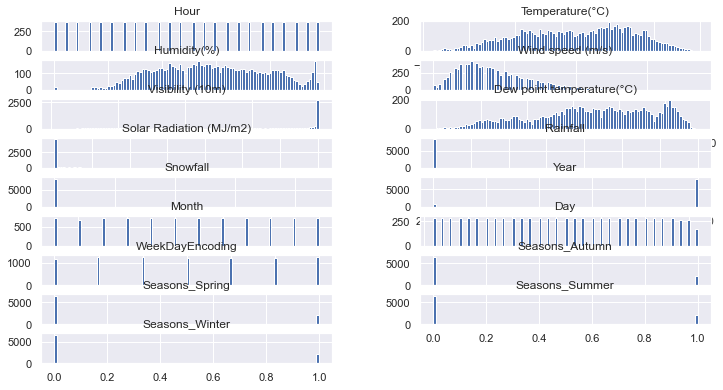

In [131]:
columns = list(bikedata)[1:] # Excluding Outcome column which has only 
bikedata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(42,2)); 
# Distribution of all columns

In [132]:
bikedata.skew(axis = 0, skipna = True)

/var/folders/v_/6m1g401s4mj71t_l_30_nnd40000gn/T/ipykernel_1380/859160955.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bikedata.skew(axis = 0, skipna = True)


Rented Bike Count             1.153428
Hour                          0.000000
Temperature(°C)              -0.198326
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Solar Radiation (MJ/m2)       1.504040
Rainfall                     14.533232
Snowfall                      8.440801
Year                         -2.978262
Month                        -0.010458
Day                           0.007522
WeekDayEncoding               0.000688
Seasons_Autumn                1.159123
Seasons_Spring                1.142294
Seasons_Summer                1.142294
Seasons_Winter                1.176139
dtype: float64

In [133]:
bikedataorig.corr()

Rented Bike Count      Hour  Temperature(°C)  \
Rented Bike Count                   1.000000  0.410257         0.538558   
Hour                                0.410257  1.000000         0.124114   
Temperature(°C)                     0.538558  0.124114         1.000000   
Humidity(%)                        -0.199780 -0.241644         0.159371   
Wind speed (m/s)                    0.121108  0.285197        -0.036252   
Visibility (10m)                    0.199280  0.098753         0.034794   
Dew point temperature(°C)           0.379788  0.003054         0.912798   
Solar Radiation (MJ/m2)             0.261837  0.145131         0.353505   
Rainfall(mm)                       -0.123074  0.008715         0.050282   
Snowfall (cm)                      -0.141804 -0.021516        -0.218405   

                           Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count            -0.199780          0.121108          0.199280   
Hour                         -0.241644          0.285197          0.098753   
Temperature(°C)               0.159371         -0.036252          0.034794   
Humidity(%)                   1.000000         -0.336683         -0.543090   
Wind speed (m/s)             -0.336683          1.000000          0.171507   
Visibility (10m)             -0.543090          0.171507          1.000000   
Dew point temperature(°C)     0.536894         -0.176486         -0.176630   
Solar Radiation (MJ/m2)      -0.461919          0.332274          0.149738   
Rainfall(mm)                  0.236397         -0.019674         -0.167629   
Snowfall (cm)                 0.108183         -0.003554         -0.121695   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                           0.379788                 0.261837   
Hour                                        0.003054                 0.145131   
Temperature(°C)                             0.912798                 0.353505   
Humidity(%)                                 0.536894                -0.461919   
Wind speed (m/s)                           -0.176486                 0.332274   
Visibility (10m)                           -0.176630                 0.149738   
Dew point temperature(°C)                   1.000000                 0.094381   
Solar Radiation (MJ/m2)                     0.094381                 1.000000   
Rainfall(mm)                                0.125597                -0.074290   
Snowfall (cm)                              -0.150887                -0.072301   

                           Rainfall(mm)  Snowfall (cm)  
Rented Bike Count             -0.123074      -0.141804  
Hour                           0.008715      -0.021516  
Temperature(°C)                0.050282      -0.218405  
Humidity(%)                    0.236397       0.108183  
Wind speed (m/s)              -0.019674      -0.003554  
Visibility (10m)              -0.167629      -0.121695  
Dew point temperature(°C)      0.125597      -0.150887  
Solar Radiation (MJ/m2)       -0.074290      -0.072301  
Rainfall(mm)                   1.000000       0.008500  
Snowfall (cm)                  0.008500       1.000000

In [134]:
def plot_corr(bikedataorig, size=26):
    corr = bikedataorig.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

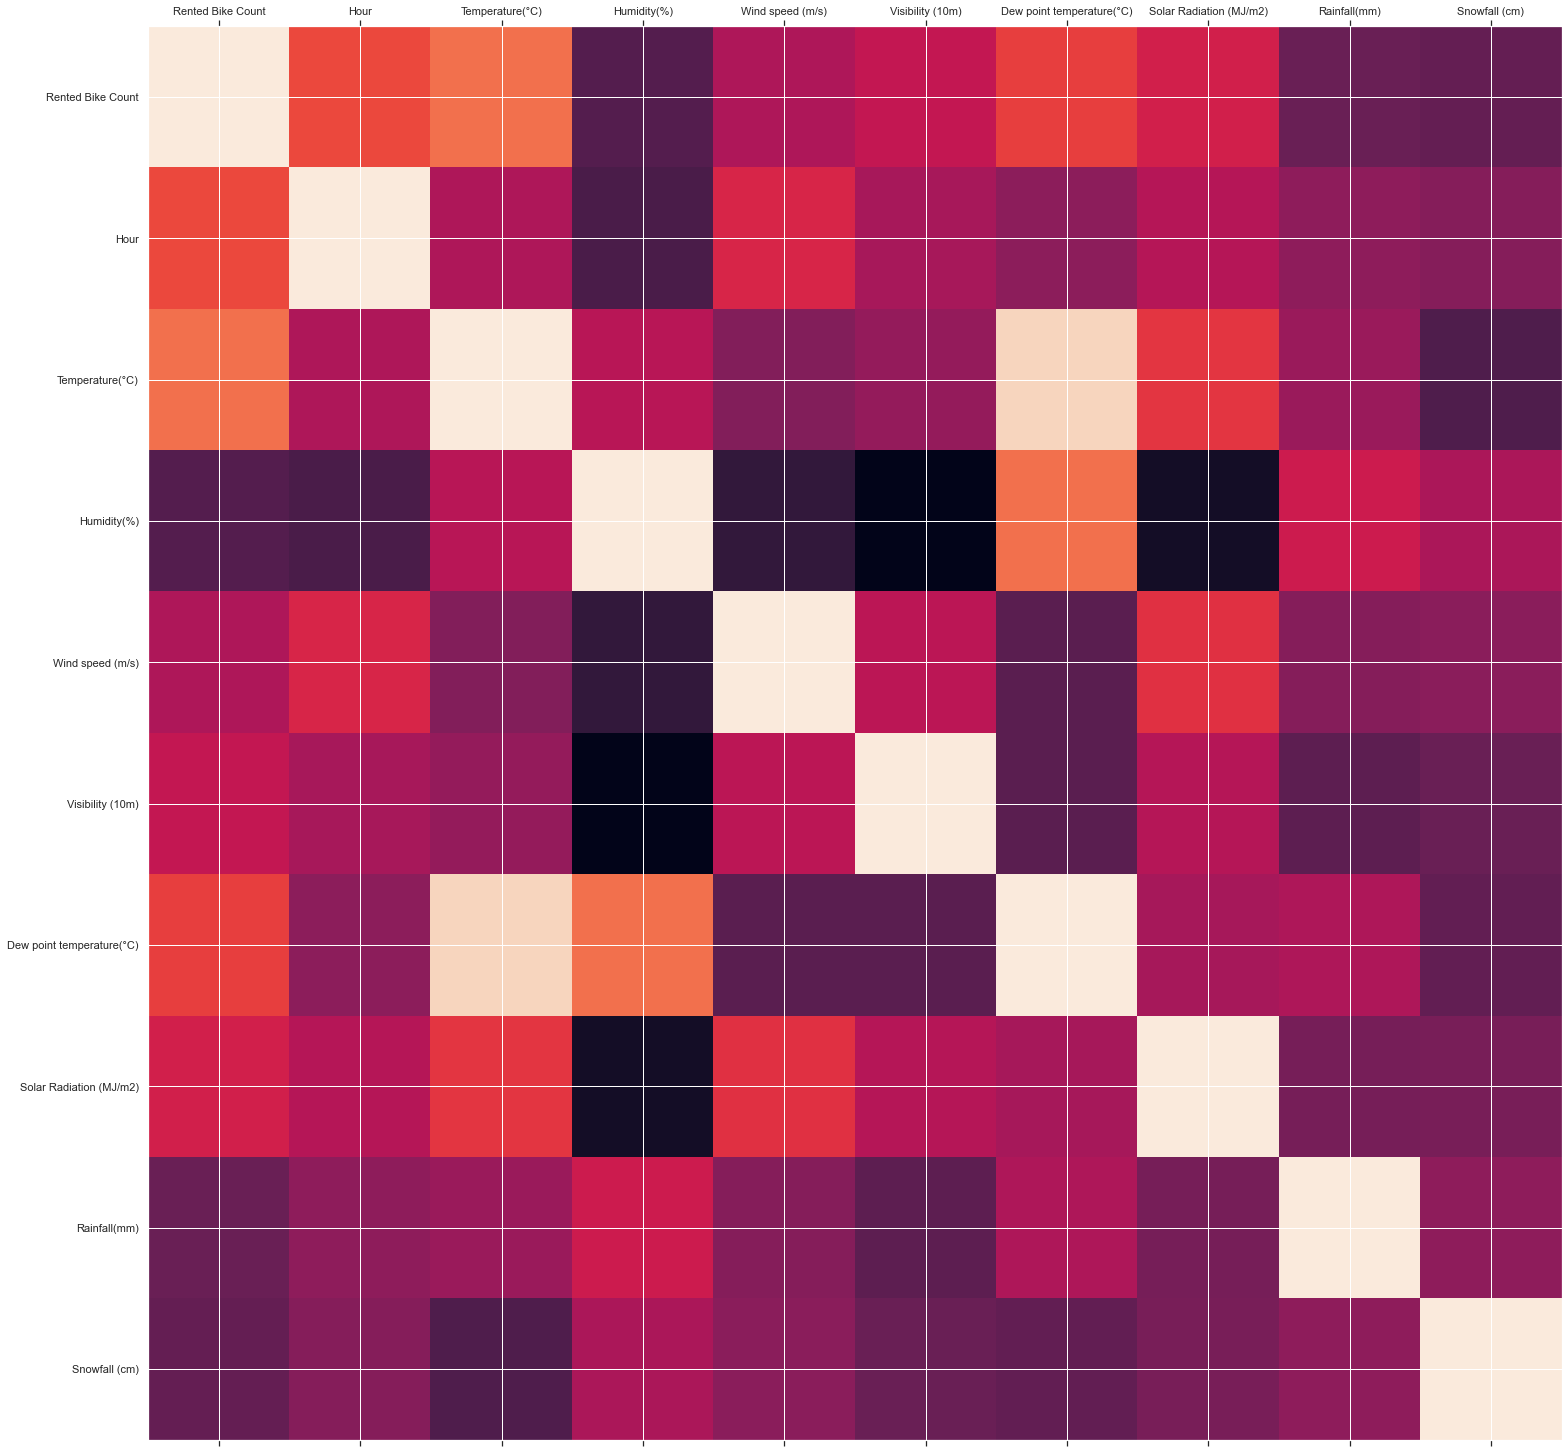

In [135]:
plot_corr(bikedataorig)

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

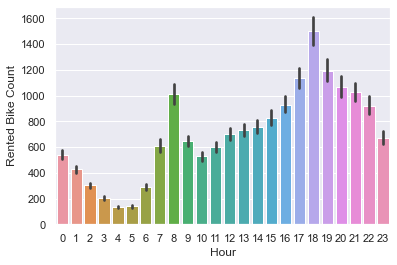

In [136]:
sns.barplot(data=bikedata, x="Hour", y="Rented Bike Count")

<AxesSubplot:xlabel='Temperature(°C)', ylabel='Rented Bike Count'>

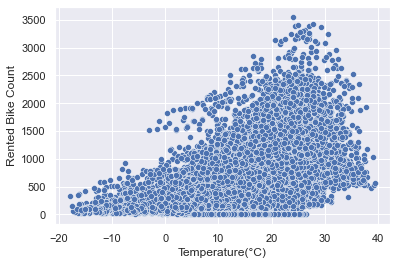

In [137]:
sns.scatterplot(data=bikedata, x="Temperature(°C)", y="Rented Bike Count")

<AxesSubplot:xlabel='Solar Radiation (MJ/m2)', ylabel='Rented Bike Count'>

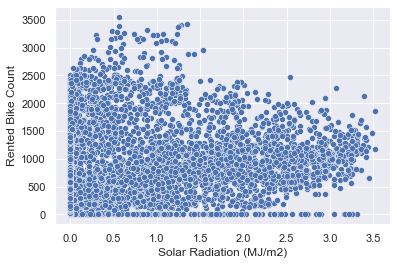

In [138]:
sns.scatterplot(data=bikedata, x="Solar Radiation (MJ/m2)", y="Rented Bike Count")

<AxesSubplot:xlabel='Visibility (10m)', ylabel='Rented Bike Count'>

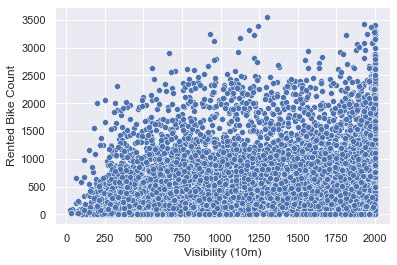

In [139]:
sns.scatterplot(data=bikedata, x="Visibility (10m)", y="Rented Bike Count")

In [140]:
bikedata.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall  Snowfall  ... FunctioningDay  Year  Month  Day   WeekDay  \
0       0.0       0.0  ...              1  2017      1   12  Thursday   
1       0.0       0.0  ...              1  2017      1   12  Thursday   
2       0.0       0.0  ...              1  2017      1   12  Thursday   
3       0.0       0.0  ...              1  2017      1   12  Thursday   
4       0.0       0.0  ...              1  2017      1   12  Thursday   

  WeekDayEncoding  Seasons_Autumn  Seasons_Spring  Seasons_Summer  \
0               4               0               0               0   
1               4               0               0               0   
2               4               0               0               0   
3               4               0               0               0   
4               4               0               0               0   

   Seasons_Winter  
0               1  
1               1  
2               1  
3               1  
4               1  

[5 rows x 21 columns]

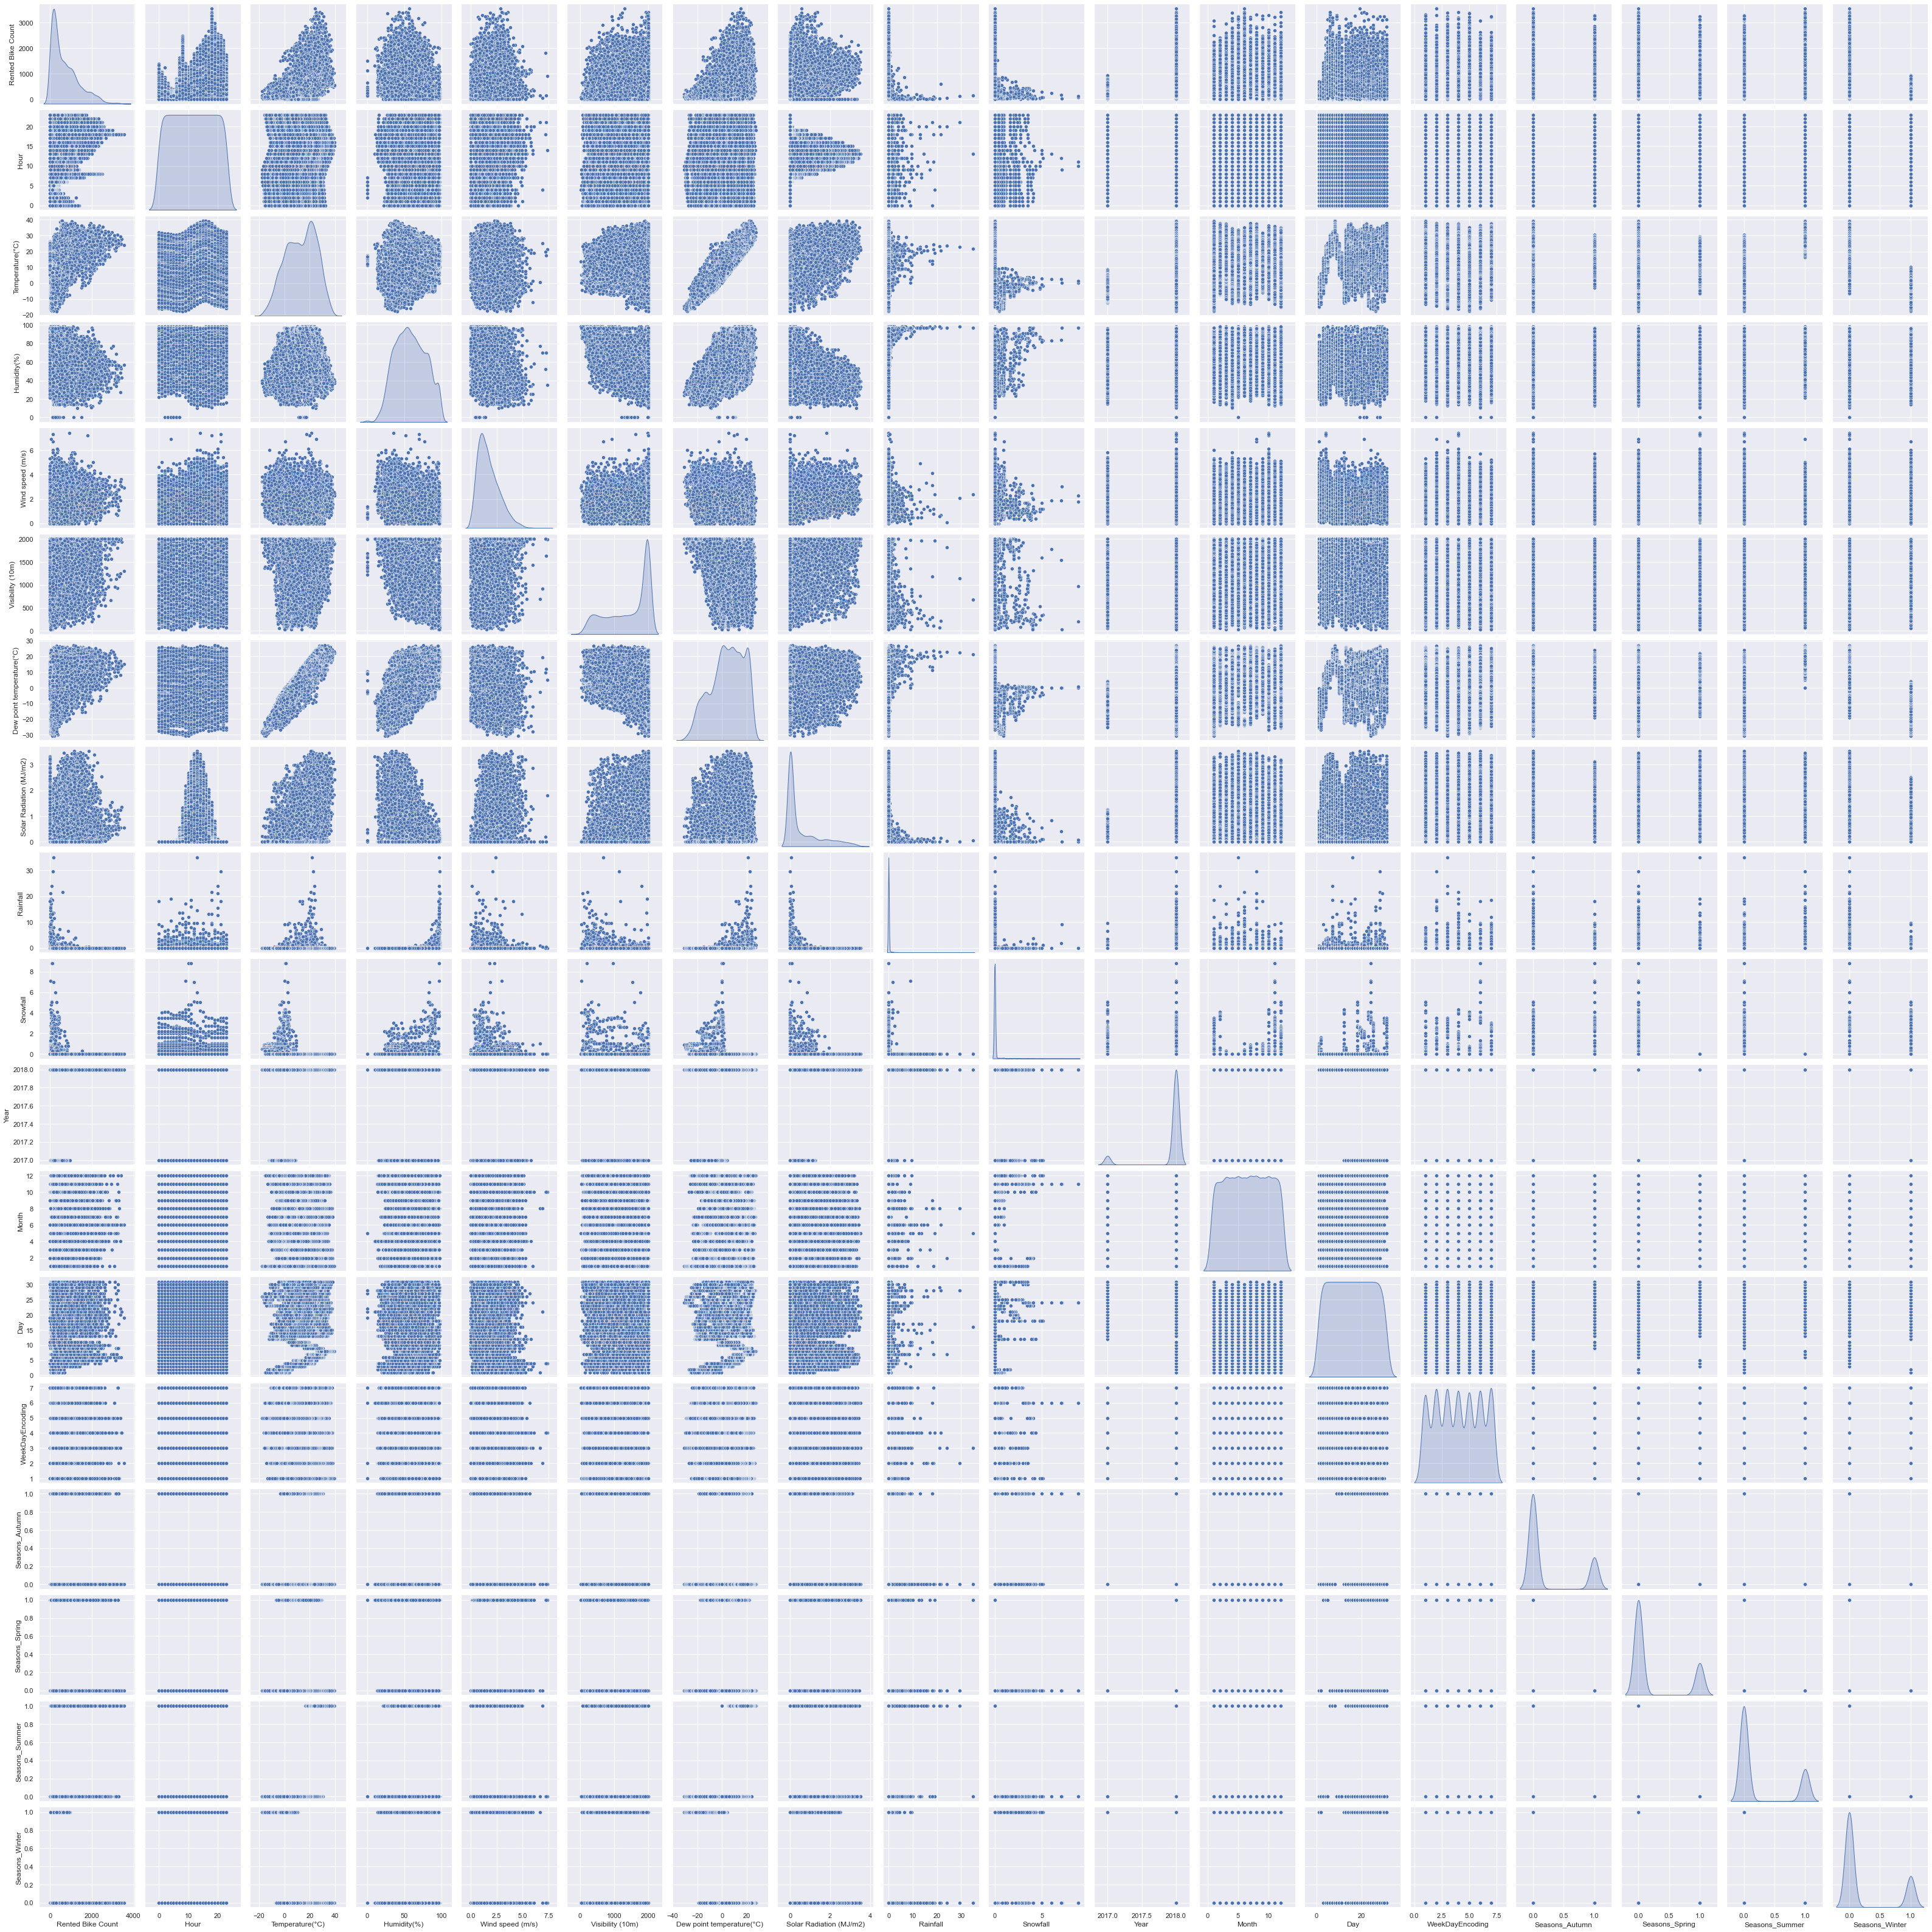

In [141]:
sns.pairplot(bikedata,diag_kind='kde')

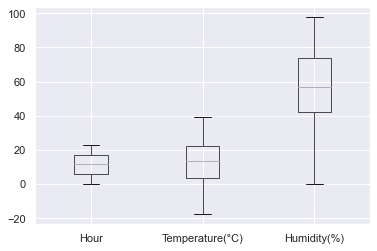

In [142]:
np.random.seed(1234)
boxplot = bikedata.boxplot(column=['Hour', 'Temperature(°C)', 'Humidity(%)'])

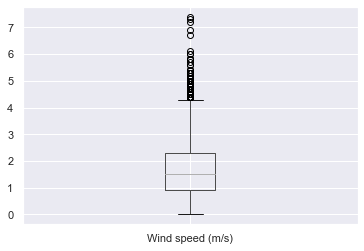

In [143]:
boxplot1=bikedata.boxplot(column=['Wind speed (m/s)'])

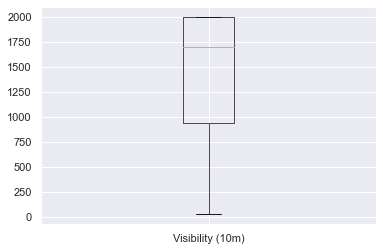

In [144]:
boxplot2=bikedata.boxplot(column=['Visibility (10m)'])

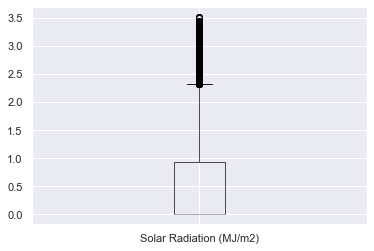

In [145]:
boxplot3=bikedata.boxplot(column=['Solar Radiation (MJ/m2)'])

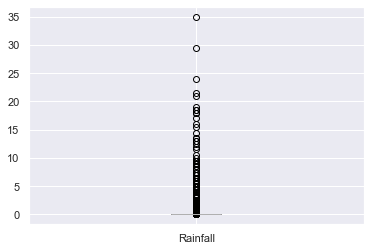

In [146]:
boxplot4=bikedata.boxplot(column=['Rainfall'])

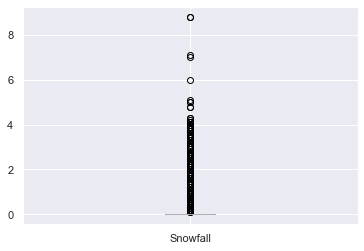

In [147]:
boxplot5=bikedata.boxplot(column=['Snowfall'])

In [148]:
oneHotCols=["Hour"]

In [149]:
bikedata=pd.get_dummies(bikedata, columns=oneHotCols)
bikedata.head(10)

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   
5                100             -6.4           37               1.5   
6                181             -6.6           35               1.3   
7                460             -7.4           38               0.9   
8                930             -7.6           37               1.1   
9                490             -6.5           27               0.5   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                     0.00   
1              2000                      -17.6                     0.00   
2              2000                      -17.7                     0.00   
3              2000                      -17.6                     0.00   
4              2000                      -18.6                     0.00   
5              2000                      -18.7                     0.00   
6              2000                      -19.5                     0.00   
7              2000                      -19.3                     0.00   
8              2000                      -19.8                     0.01   
9              1928                      -22.4                     0.23   

   Rainfall  Snowfall Holiday  ... Hour_14  Hour_15  Hour_16  Hour_17 Hour_18  \
0       0.0       0.0       0  ...       0        0        0        0       0   
1       0.0       0.0       0  ...       0        0        0        0       0   
2       0.0       0.0       0  ...       0        0        0        0       0   
3       0.0       0.0       0  ...       0        0        0        0       0   
4       0.0       0.0       0  ...       0        0        0        0       0   
5       0.0       0.0       0  ...       0        0        0        0       0   
6       0.0       0.0       0  ...       0        0        0        0       0   
7       0.0       0.0       0  ...       0        0        0        0       0   
8       0.0       0.0       0  ...       0        0        0        0       0   
9       0.0       0.0       0  ...       0        0        0        0       0   

   Hour_19  Hour_20  Hour_21  Hour_22  Hour_23  
0        0        0        0        0        0  
1        0        0        0        0        0  
2        0        0        0        0        0  
3        0        0        0        0        0  
4        0        0        0        0        0  
5        0        0        0        0        0  
6        0        0        0        0        0  
7        0        0        0        0        0  
8        0        0        0        0        0  
9        0        0        0        0        0  

[10 rows x 44 columns]

In [150]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Temperature(°C)            8760 non-null   float64 
 2   Humidity(%)                8760 non-null   int64   
 3   Wind speed (m/s)           8760 non-null   float64 
 4   Visibility (10m)           8760 non-null   int64   
 5   Dew point temperature(°C)  8760 non-null   float64 
 6   Solar Radiation (MJ/m2)    8760 non-null   float64 
 7   Rainfall                   8760 non-null   float64 
 8   Snowfall                   8760 non-null   float64 
 9   Holiday                    8760 non-null   category
 10  FunctioningDay             8760 non-null   category
 11  Year                       8760 non-null   int64   
 12  Month                      8760 non-null   int64   
 13  Day                        8760 n

In [151]:
bikedata=bikedata.drop('Dew point temperature(°C)',axis=1)
bikedata=bikedata.drop('WeekDay',axis=1)
bikedata=bikedata.drop('Hour_0',axis=1)
bikedata=bikedata.drop('Seasons_Autumn',axis=1)
#Dropping since dew point and temperature are highly correlated

In [152]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Rented Bike Count        8760 non-null   int64   
 1   Temperature(°C)          8760 non-null   float64 
 2   Humidity(%)              8760 non-null   int64   
 3   Wind speed (m/s)         8760 non-null   float64 
 4   Visibility (10m)         8760 non-null   int64   
 5   Solar Radiation (MJ/m2)  8760 non-null   float64 
 6   Rainfall                 8760 non-null   float64 
 7   Snowfall                 8760 non-null   float64 
 8   Holiday                  8760 non-null   category
 9   FunctioningDay           8760 non-null   category
 10  Year                     8760 non-null   int64   
 11  Month                    8760 non-null   int64   
 12  Day                      8760 non-null   int64   
 13  WeekDayEncoding          8760 non-null   int64   
 14  Seasons_

In [153]:
bikedata.isnull().sum()

Rented Bike Count          0
Temperature(°C)            0
Humidity(%)                0
Wind speed (m/s)           0
Visibility (10m)           0
Solar Radiation (MJ/m2)    0
Rainfall                   0
Snowfall                   0
Holiday                    0
FunctioningDay             0
Year                       0
Month                      0
Day                        0
WeekDayEncoding            0
Seasons_Spring             0
Seasons_Summer             0
Seasons_Winter             0
Hour_1                     0
Hour_2                     0
Hour_3                     0
Hour_4                     0
Hour_5                     0
Hour_6                     0
Hour_7                     0
Hour_8                     0
Hour_9                     0
Hour_10                    0
Hour_11                    0
Hour_12                    0
Hour_13                    0
Hour_14                    0
Hour_15                    0
Hour_16                    0
Hour_17                    0
Hour_18       

In [154]:
bikedata["Rented Bike Count"].head()

0    254
1    204
2    173
3    107
4     78
Name: Rented Bike Count, dtype: int64

In [155]:
bikedata.describe()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
count        8760.000000      8760.000000  8760.000000       8760.000000   
mean          704.602055        12.882922    58.226256          1.724909   
std           644.997468        11.944825    20.362413          1.036300   
min             0.000000       -17.800000     0.000000          0.000000   
25%           191.000000         3.500000    42.000000          0.900000   
50%           504.500000        13.700000    57.000000          1.500000   
75%          1065.250000        22.500000    74.000000          2.300000   
max          3556.000000        39.400000    98.000000          7.400000   

       Visibility (10m)  Solar Radiation (MJ/m2)     Rainfall     Snowfall  \
count       8760.000000              8760.000000  8760.000000  8760.000000   
mean        1436.825799                 0.569111     0.148687     0.075068   
std          608.298712                 0.868746     1.128193     0.436746   
min           27.000000                 0.000000     0.000000     0.000000   
25%          940.000000                 0.000000     0.000000     0.000000   
50%         1698.000000                 0.010000     0.000000     0.000000   
75%         2000.000000                 0.930000     0.000000     0.000000   
max         2000.000000                 3.520000    35.000000     8.800000   

              Year        Month  ...      Hour_14      Hour_15      Hour_16  \
count  8760.000000  8760.000000  ...  8760.000000  8760.000000  8760.000000   
mean   2017.915068     6.526027  ...     0.041667     0.041667     0.041667   
std       0.278796     3.448048  ...     0.199838     0.199838     0.199838   
min    2017.000000     1.000000  ...     0.000000     0.000000     0.000000   
25%    2018.000000     4.000000  ...     0.000000     0.000000     0.000000   
50%    2018.000000     7.000000  ...     0.000000     0.000000     0.000000   
75%    2018.000000    10.000000  ...     0.000000     0.000000     0.000000   
max    2018.000000    12.000000  ...     1.000000     1.000000     1.000000   

           Hour_17      Hour_18      Hour_19      Hour_20      Hour_21  \
count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean      0.041667     0.041667     0.041667     0.041667     0.041667   
std       0.199838     0.199838     0.199838     0.199838     0.199838   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           Hour_22      Hour_23  
count  8760.000000  8760.000000  
mean      0.041667     0.041667  
std       0.199838     0.199838  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     1.000000  

[8 rows x 38 columns]

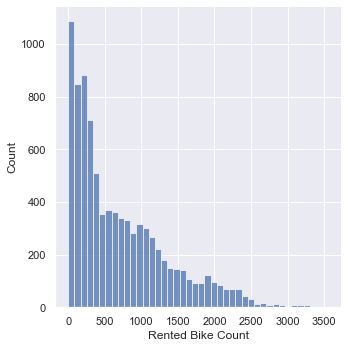

In [156]:
sns.set_theme()
sns.displot(bikedata['Rented Bike Count'])

In [157]:
bikecountmedian = bikedata['Rented Bike Count'].median()
bikecountmedian
#Since the data is right skewed we will consider median in this case if normally distributed we would have consderede mean

504.5

In [158]:
bikedata["Rented Bike Count"] = np.where(bikedata["Rented Bike Count"] <= bikecountmedian, 0, 1)
bikedata["Rented Bike Count"].unique()

array([0, 1])

In [159]:
bikedata.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                  0             -5.2           37               2.2   
1                  0             -5.5           38               0.8   
2                  0             -6.0           39               1.0   
3                  0             -6.2           40               0.9   
4                  0             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall  Snowfall Holiday  \
0              2000                      0.0       0.0       0.0       0   
1              2000                      0.0       0.0       0.0       0   
2              2000                      0.0       0.0       0.0       0   
3              2000                      0.0       0.0       0.0       0   
4              2000                      0.0       0.0       0.0       0   

  FunctioningDay  ...  Hour_14  Hour_15  Hour_16  Hour_17  Hour_18  Hour_19  \
0              1  ...        0        0        0        0        0        0   
1              1  ...        0        0        0        0        0        0   
2              1  ...        0        0        0        0        0        0   
3              1  ...        0        0        0        0        0        0   
4              1  ...        0        0        0        0        0        0   

   Hour_20  Hour_21  Hour_22  Hour_23  
0        0        0        0        0  
1        0        0        0        0  
2        0        0        0        0  
3        0        0        0        0  
4        0        0        0        0  

[5 rows x 40 columns]

## Split Data & Scaling

In [160]:
X = bikedata.drop("Rented Bike Count", axis=1)
y = bikedata['Rented Bike Count']

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

In [162]:
X_train.head()

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
1444            -11.1           50               1.2              1986   
1652             -5.8           44               2.1              1994   
7496             11.4           66               0.8              1991   
1893             -2.3           38               2.3              2000   
3880             19.1           54               3.2               542   

      Solar Radiation (MJ/m2)  Rainfall  Snowfall Holiday FunctioningDay  \
1444                     0.00       0.0       0.0       0              1   
1652                     0.00       0.0       0.0       0              1   
7496                     0.18       0.0       0.0       1              0   
1893                     0.00       0.0       0.0       1              1   
3880                     0.94       0.0       0.0       0              1   

      Year  ...  Hour_14  Hour_15  Hour_16  Hour_17  Hour_18  Hour_19  \
1444  2018  ...        0        0        0        0        0        0   
1652  2018  ...        0        0        0        0        0        0   
7496  2018  ...        0        0        0        0        0        0   
1893  2018  ...        0        0        0        0        0        0   
3880  2018  ...        0        0        1        0        0        0   

      Hour_20  Hour_21  Hour_22  Hour_23  
1444        0        0        0        0  
1652        1        0        0        0  
7496        0        0        0        0  
1893        0        1        0        0  
3880        0        0        0        0  

[5 rows x 39 columns]

In [163]:
y_train.head()

1444    0
1652    0
7496    0
1893    0
3880    1
Name: Rented Bike Count, dtype: int64

In [164]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xtrain_transform=sc.fit_transform(X_train)

In [165]:
Xtest_transform=sc.fit_transform(X_test)

### Modelling

In [166]:
class_names = [0,1]

## Nueral Network 

### Experimenting with nr of layers

In [167]:
from sklearn.neural_network import MLPClassifier
hiddenlayerlist=[(10,),(10,10),(10,10,10),(10,10,10,10)]
nnmodeltrainscorelist=[]
nnmodeltestscorelist=[]
nnmodeltimecmplxlist=[]
loss_curve_list=[]
iterlist=[]
j=0

[0.9295499021526419, 0.9336268754076973, 0.943900848010437, 0.9487932159165036]
[0.926179604261796, 0.9341704718417048, 0.9330289193302892, 0.9307458143074582]
[5.222476005554199, 7.933324098587036, 14.76965594291687, 24.363405227661133]
[352, 374, 552, 618]


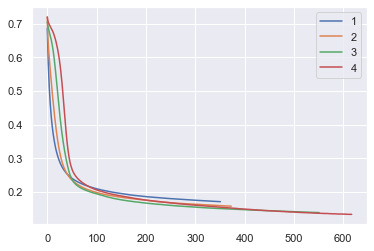

In [168]:
for i in range(len(hiddenlayerlist)):
    starttime=time.time()
    j=i+1
    nnmodel=MLPClassifier(hidden_layer_sizes=hiddenlayerlist[i],solver='sgd',max_iter=1000000,random_state=42)
    nnmodel.fit(Xtrain_transform,y_train)
    endtime=time.time()
    nnmodeltrainscore=nnmodel.score(Xtrain_transform, y_train)
    nnmodeltestscore=nnmodel.score(Xtest_transform, y_test)
    timecmplx=endtime-starttime
    loss_curve_list=nnmodel.loss_curve_
    maxiter=nnmodel.n_iter_
    iterlist.append(maxiter)
    nnmodeltrainscorelist.append(nnmodeltrainscore)
    nnmodeltestscorelist.append(nnmodeltestscore)
    nnmodeltimecmplxlist.append(timecmplx)
    plt.plot(loss_curve_list,label=j)
    plt.legend(loc="upper right")
print(nnmodeltrainscorelist)
print(nnmodeltestscorelist)
print(nnmodeltimecmplxlist)
print(iterlist)

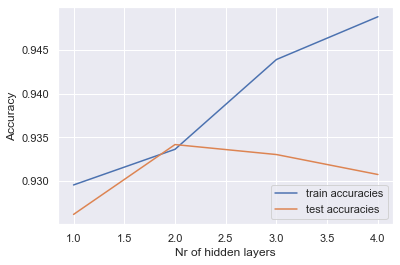

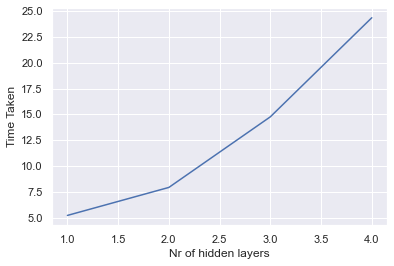

In [169]:
hiddenlayer_cnt=[1,2,3,4]
plt.plot(hiddenlayer_cnt, nnmodeltrainscorelist,label="train accuracies")
plt.plot(hiddenlayer_cnt, nnmodeltestscorelist,label="test accuracies")
plt.legend(loc="lower right")
plt.xlabel("Nr of hidden layers")
plt.ylabel("Accuracy")
plt.show()
plt.plot(hiddenlayer_cnt, nnmodeltimecmplxlist,label="time complexity")
plt.xlabel("Nr of hidden layers")
plt.ylabel("Time Taken")
plt.show()

##### From the above it is clearly indicating that with 2 layers we are getting the efficient results w.r.t accuracies and w.r.t time complexity and w.r.t algorithm convergence, so we take baseline as 2 layers and continue experimenting with different nr of nodes

### Experimenting with nr of Nodes

In [170]:
from sklearn.neural_network import MLPClassifier
hiddenlayernodelist=[(2,2),(5,5),(10,10),(15,15),(20,20),(25,25),(30,30)]
nnmodeltrainscorelist1=[]
nnmodeltestscorelist1=[]
nnmodeltimecmplxlist1=[]
loss_curve_list1=[]
iterlist1=[]
j=0

[0.9192759295499021, 0.9306914546640574, 0.9336268754076973, 0.9463470319634704, 0.9443900848010437, 0.9496086105675147, 0.9548271363339856]
[0.9166666666666666, 0.9246575342465754, 0.9341704718417048, 0.9330289193302892, 0.9315068493150684, 0.932648401826484, 0.9292237442922374]
[5.722140312194824, 8.50084900856018, 7.893465042114258, 18.318354845046997, 16.679863214492798, 21.555198907852173, 29.61876893043518]
[330, 418, 374, 568, 478, 607, 814]


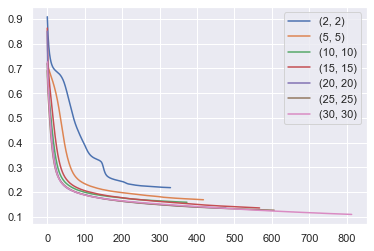

In [171]:
for i in range(len(hiddenlayernodelist)):
    starttime=time.time()
    j=i+1
    nnmodel=MLPClassifier(hidden_layer_sizes=hiddenlayernodelist[i],solver='sgd',max_iter=1000000,random_state=42)
    nnmodel.fit(Xtrain_transform,y_train)
    endtime=time.time()
    nnmodeltrainscore=nnmodel.score(Xtrain_transform, y_train)
    nnmodeltestscore=nnmodel.score(Xtest_transform, y_test)
    timecmplx=endtime-starttime
    loss_curve_list=nnmodel.loss_curve_
    maxiter=nnmodel.n_iter_
    iterlist1.append(maxiter)
    nnmodeltrainscorelist1.append(nnmodeltrainscore)
    nnmodeltestscorelist1.append(nnmodeltestscore)
    nnmodeltimecmplxlist1.append(timecmplx)
    plt.plot(loss_curve_list,label=hiddenlayernodelist[i])
    plt.legend(loc="upper right")
print(nnmodeltrainscorelist1)
print(nnmodeltestscorelist1)
print(nnmodeltimecmplxlist1)
print(iterlist1)

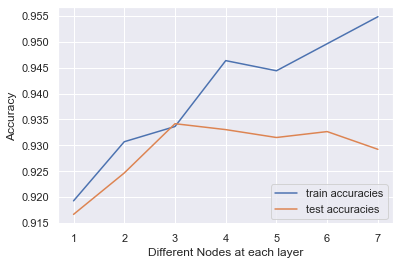

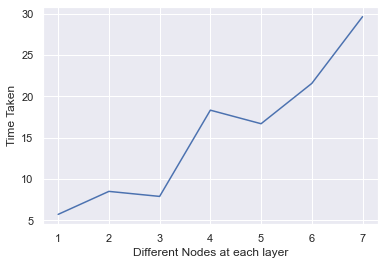

In [172]:
hiddenlayer_cnt=[1,2,3,4,5,6,7]
plt.plot(hiddenlayer_cnt, nnmodeltrainscorelist1,label="train accuracies")
plt.plot(hiddenlayer_cnt, nnmodeltestscorelist1,label="test accuracies")
plt.legend(loc="lower right")
plt.xlabel("Different Nodes at each layer")
plt.ylabel("Accuracy")
plt.show()
plt.plot(hiddenlayer_cnt, nnmodeltimecmplxlist1,label="time complexity")
plt.xlabel("Different Nodes at each layer")
plt.ylabel("Time Taken")
plt.show()

##### From above we can conclude that at nodes (10,10) model is predicting good and converging faster 

### Experimenting with different activation functions

In [173]:
from sklearn.neural_network import MLPClassifier
activationfunctions=['identity','logistic','tanh','relu']
nnmodeltrainscorelist2=[]
nnmodeltestscorelist2=[]
nnmodeltimecmplxlist2=[]
loss_curve_list=[]
iterlist2=[]
j=0

[0.9165035877364645, 0.9165035877364645, 0.934931506849315, 0.9336268754076973]
[0.908675799086758, 0.906392694063927, 0.9318873668188736, 0.9341704718417048]
[1.995859146118164, 11.339592933654785, 8.492470026016235, 7.852427005767822]
[98, 521, 393, 374]


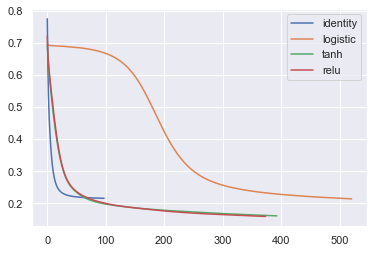

In [174]:
for i in range(len(activationfunctions)):
    starttime=time.time()
    j=i+1
    nnmodel=MLPClassifier(hidden_layer_sizes=(10,10),activation=activationfunctions[i],solver='sgd',max_iter=1000000,random_state=42)
    nnmodel.fit(Xtrain_transform,y_train)
    endtime=time.time()
    nnmodeltrainscore=nnmodel.score(Xtrain_transform, y_train)
    nnmodeltestscore=nnmodel.score(Xtest_transform, y_test)
    timecmplx=endtime-starttime
    loss_curve_list=nnmodel.loss_curve_
    maxiter=nnmodel.n_iter_
    iterlist2.append(maxiter)
    nnmodeltrainscorelist2.append(nnmodeltrainscore)
    nnmodeltestscorelist2.append(nnmodeltestscore)
    nnmodeltimecmplxlist2.append(timecmplx)
    plt.plot(loss_curve_list,label=activationfunctions[i])
    plt.legend(loc="upper right")
print(nnmodeltrainscorelist2)
print(nnmodeltestscorelist2)
print(nnmodeltimecmplxlist2)
print(iterlist2)

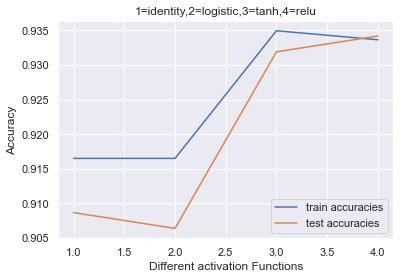

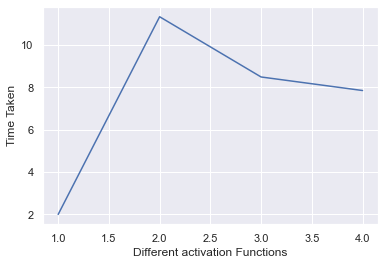

In [175]:
activationfunctionforplot=[1,2,3,4]
plt.plot(activationfunctionforplot, nnmodeltrainscorelist2,label="train accuracies")
plt.plot(activationfunctionforplot, nnmodeltestscorelist2,label="test accuracies")
plt.legend(loc="lower right")
plt.xlabel("Different activation Functions")
plt.ylabel("Accuracy")
plt.title("1=identity,2=logistic,3=tanh,4=relu")
plt.show()
plt.plot(activationfunctionforplot, nnmodeltimecmplxlist2,label="time complexity")
plt.xlabel("Different activation Functions")
plt.ylabel("Time Taken")
plt.show()

##### From the above we can observe that with activation function = relu model performance is good and converged faster

### Experimenting with different solvers

In [176]:
solvers=['lbfgs','sgd','adam']
nnmodeltrainscorelist3=[]
nnmodeltestscorelist3=[]
nnmodeltimecmplxlist3=[]
iterlist3=[]

In [177]:
for i in range(len(solvers)):
    starttime=time.time()
    j=i+1
    nnmodel=MLPClassifier(hidden_layer_sizes=(10,10),activation='relu',solver=solvers[i],max_iter=1000000,random_state=42)
    nnmodel.fit(Xtrain_transform,y_train)
    endtime=time.time()
    nnmodeltrainscore=nnmodel.score(Xtrain_transform, y_train)
    nnmodeltestscore=nnmodel.score(Xtest_transform, y_test)
    timecmplx=endtime-starttime
    maxiter=nnmodel.n_iter_
    iterlist3.append(maxiter)
    nnmodeltrainscorelist3.append(nnmodeltrainscore)
    nnmodeltestscorelist3.append(nnmodeltestscore)
    nnmodeltimecmplxlist3.append(timecmplx)
print(nnmodeltrainscorelist3)
print(nnmodeltestscorelist3)
print(nnmodeltimecmplxlist3)
print(iterlist3)

[0.973744292237443, 0.9336268754076973, 0.9571102413568167]
[0.9159056316590564, 0.9341704718417048, 0.9345509893455098]
[14.142932891845703, 7.762081861495972, 7.530855894088745]
[3301, 374, 338]


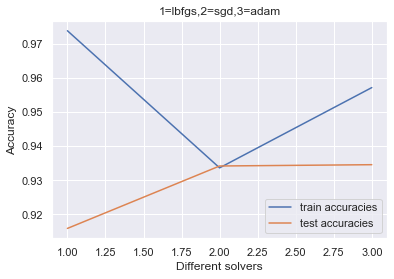

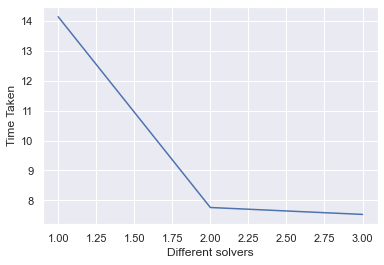

In [178]:
solverforplot=[1,2,3]
plt.plot(solverforplot, nnmodeltrainscorelist3,label="train accuracies")
plt.plot(solverforplot, nnmodeltestscorelist3,label="test accuracies")
plt.legend(loc="lower right")
plt.xlabel("Different solvers")
plt.ylabel("Accuracy")
plt.title("1=lbfgs,2=sgd,3=adam")
plt.show()
plt.plot(solverforplot, nnmodeltimecmplxlist3,label="time complexity")
plt.xlabel("Different solvers")
plt.ylabel("Time Taken")
plt.show()

##### From above experiment we can observe that when solver is sgd model perofmrance is good and converged faster

### Experiment with different learning_rate_init

In [179]:
learning_rate_inits=[0.1,0.01,0.001,0.0001,0.00001,0.000001]
nnmodeltrainscorelist4=[]
nnmodeltestscorelist4=[]
nnmodeltimecmplxlist4=[]
loss_curve_list=[]
iterlist4=[]
j=0

[0.9584148727984344, 0.9577625570776256, 0.9336268754076973, 0.9103065883887802, 0.8726353555120678, 0.5575668623613829]
[0.9189497716894978, 0.9311263318112634, 0.9341704718417048, 0.9082952815829528, 0.8793759512937596, 0.5464231354642314]
[2.323122024536133, 7.076920032501221, 8.251890182495117, 13.38518500328064, 49.178401947021484, 7.582118272781372]
[106, 317, 374, 623, 2093, 338]


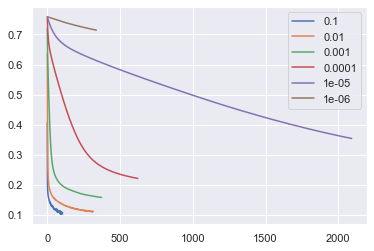

In [180]:
for i in range(len(learning_rate_inits)):
    starttime=time.time()
    j=i+1
    nnmodel=MLPClassifier(hidden_layer_sizes=(10,10),activation='relu',learning_rate_init=learning_rate_inits[i],solver='sgd',max_iter=1000000,random_state=42)
    nnmodel.fit(Xtrain_transform,y_train)
    endtime=time.time()
    nnmodeltrainscore=nnmodel.score(Xtrain_transform, y_train)
    nnmodeltestscore=nnmodel.score(Xtest_transform, y_test)
    timecmplx=endtime-starttime
    loss_curve_list=nnmodel.loss_curve_
    maxiter=nnmodel.n_iter_
    iterlist4.append(maxiter)
    nnmodeltrainscorelist4.append(nnmodeltrainscore)
    nnmodeltestscorelist4.append(nnmodeltestscore)
    nnmodeltimecmplxlist4.append(timecmplx)
    plt.plot(loss_curve_list,label=learning_rate_inits[i])
    plt.legend(loc="upper right")
print(nnmodeltrainscorelist4)
print(nnmodeltestscorelist4)
print(nnmodeltimecmplxlist4)
print(iterlist4)

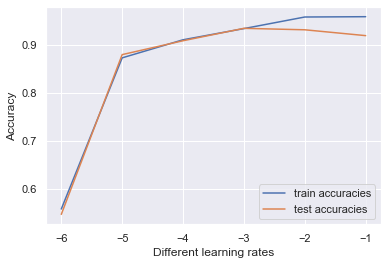

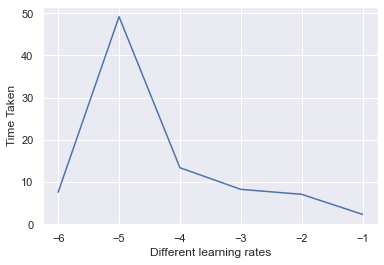

In [181]:
plt.plot(np.log10(learning_rate_inits), nnmodeltrainscorelist4,label="train accuracies")
plt.plot(np.log10(learning_rate_inits), nnmodeltestscorelist4,label="test accuracies")
plt.legend(loc="lower right")
plt.xlabel("Different learning rates")
plt.ylabel("Accuracy")
plt.show()
plt.plot(np.log10(learning_rate_inits), nnmodeltimecmplxlist4,label="time complexity")
plt.xlabel("Different learning rates")
plt.ylabel("Time Taken")
plt.show()

##### From above experiment we can conclude that at learning_rate_init = 0.001 model is performing better and converging faster

### Experimenting with tol(Threshold)

In [182]:
tols=[1e-3,1e-6,1e-9,1e-12,1e-15,1e-18,1e-21,1e-24]
nnmodeltrainscorelist5=[]
nnmodeltestscorelist5=[]
nnmodeltimecmplxlist5=[]
loss_curve_list=[]
iterlist5=[]

[0.912426614481409, 0.9500978473581213, 0.9500978473581213, 0.9500978473581213, 0.9500978473581213, 0.9500978473581213, 0.9500978473581213, 0.9500978473581213]
[0.9105783866057838, 0.934931506849315, 0.934931506849315, 0.934931506849315, 0.934931506849315, 0.934931506849315, 0.934931506849315, 0.934931506849315]
[2.0513498783111572, 36.05660390853882, 34.00745606422424, 33.21791076660156, 32.66803789138794, 34.05521106719971, 34.847471714019775, 33.44722390174866]
[71, 1529, 1529, 1529, 1529, 1529, 1529, 1529]


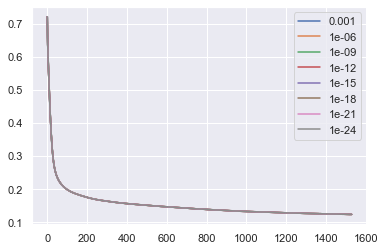

In [183]:
for i in range(len(tols)):
    starttime=time.time()
    j=i+1
    nnmodel=MLPClassifier(hidden_layer_sizes=(10,10),activation='relu',learning_rate_init=0.001,tol=tols[i],solver='sgd',max_iter=1000000,random_state=42)
    nnmodel.fit(Xtrain_transform,y_train)
    endtime=time.time()
    nnmodeltrainscore=nnmodel.score(Xtrain_transform, y_train)
    nnmodeltestscore=nnmodel.score(Xtest_transform, y_test)
    timecmplx=endtime-starttime
    loss_curve_list=nnmodel.loss_curve_
    maxiter=nnmodel.n_iter_
    iterlist5.append(maxiter)
    nnmodeltrainscorelist5.append(nnmodeltrainscore)
    nnmodeltestscorelist5.append(nnmodeltestscore)
    nnmodeltimecmplxlist5.append(timecmplx)
    plt.plot(loss_curve_list,label=tols[i])
    plt.legend(loc="upper right")
print(nnmodeltrainscorelist5)
print(nnmodeltestscorelist5)
print(nnmodeltimecmplxlist5)
print(iterlist5)

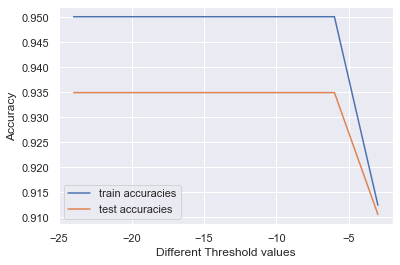

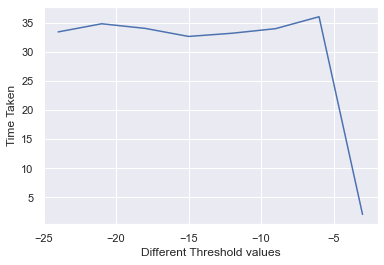

In [184]:
plt.plot(np.log10(tols), nnmodeltrainscorelist5,label="train accuracies")
plt.plot(np.log10(tols), nnmodeltestscorelist5,label="test accuracies")
plt.legend(loc="lower left")
plt.xlabel("Different Threshold values")
plt.ylabel("Accuracy")
plt.show()
plt.plot(np.log10(tols), nnmodeltimecmplxlist5,label="time complexity")
plt.xlabel("Different Threshold values")
plt.ylabel("Time Taken")
plt.show()

##### From above we can conclude that after tol=10-6 there is no much change in the model so we can take 1e-4 as base line value

### Best Tuned Nueral Network model :

In [185]:
nnfinalmodel=MLPClassifier(hidden_layer_sizes=(10,10),activation='relu',learning_rate_init=0.001,tol=1e-4,solver='sgd',max_iter=1000000,random_state=42)
nnfinalmodel.fit(Xtrain_transform,y_train)
print(nnfinalmodel.score(Xtrain_transform,y_train))
print(nnfinalmodel.score(Xtest_transform,y_test))

0.9336268754076973
0.9341704718417048


Confusion matrix, without normalization
[[1226   98]
 [  75 1229]]
Normalized confusion matrix
[[0.92598187 0.07401813]
 [0.05751534 0.94248466]]


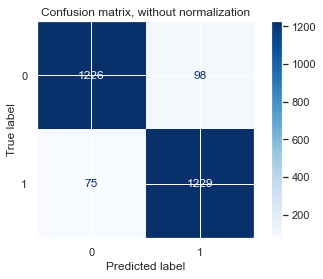

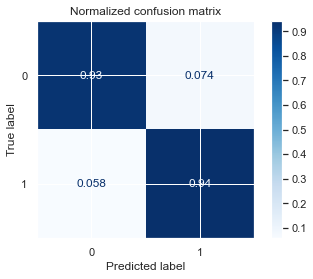

In [186]:
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        nnfinalmodel,
        Xtest_transform,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [187]:
y_pred = nnfinalmodel.predict(Xtest_transform) # This will give you positive class prediction probabilities  
nnfinalmodel.score(Xtest_transform, y_pred)
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9342332678442349

Text(0.5, 0, 'False Positive Rate')

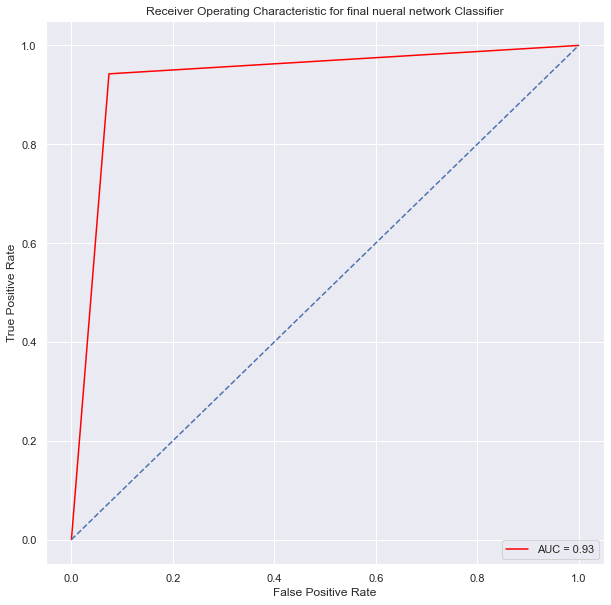

In [188]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic for final nueral network Classifier')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Cross Validation Experimentation

In [189]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
cvs=[2,5,10,15,20,25]
crossvalidationscores=[]
for i in range(len(cvs)):
    kfold = KFold(n_splits=cvs[i], random_state=42,shuffle=True)
    model= MLPClassifier(hidden_layer_sizes=(10,10),activation='relu',learning_rate_init=0.001,tol=1e-4,solver='sgd',max_iter=1000000,random_state=42)
    results = cross_val_score(model, Xtrain_transform, y_train, cv=kfold)
    crossvalidationscore=np.mean(results)*100.0
    crossvalidationscores.append(crossvalidationscore)
print(crossvalidationscores)

[91.29158512720157, 92.05824362395317, 92.18806956762012, 91.91124534573405, 92.05786549147345, 92.15516840882694]


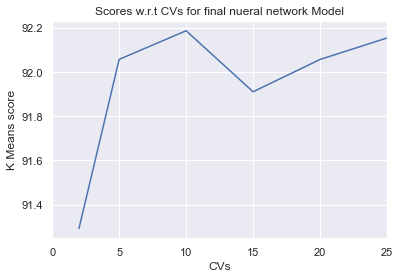

In [190]:
plt.plot(cvs,crossvalidationscores)
#plt.legend(loc="upper right")
plt.xlabel("CVs")
plt.ylabel("K Means score")
plt.title("Scores w.r.t CVs for final nueral network Model")
#plt.legend(loc="upper right")
plt.xlim(0,25)
plt.show()